# HW1: Смирнов Андрей

In [2]:
import pandas as pd # импортируем Pandas
import numpy as np
%matplotlib inline

In [3]:
data = pd.read_csv('./data/titanic/train.csv')

In [4]:
data.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.describe() # различные статистики

,Unnamed: 0,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,445.000000,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.500000,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,445.000000,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,667.500000,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,890.000000,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
print('Количество пассажиров: ', data.PassengerId.nunique())
print('Процент выживших: {} %'.format(int(100 * data['Survived'].sum() / data.PassengerId.nunique())))

Количество пассажиров:  891
Процент выживших: 38 %


## Гипотеза 1: Женщин из дорогих классов активнее спасали, чем других

In [7]:
data

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
data.groupby(['Pclass','Sex'])[['Survived']].agg(['sum', 'count'])

Survived      
                   sum count
Pclass Sex                  
1      female       91    94
       male         45   122
2      female       70    76
       male         17   108
3      female       72   144
       male         47   347

In [9]:
grp = data.groupby(['Pclass','Sex'])[['Survived']].agg(['sum', 'count'])

In [10]:
grp['Percent_Survived'] = 100*grp['Survived','sum'] / grp['Survived','count']

### Гипотеза подтвердилась. Женщин спасали в среднем лучше, чем мужчин. И почти все женщины из 1,2 класса спаслись

In [11]:
grp

Survived       Percent_Survived
                   sum count                 
Pclass Sex                                   
1      female       91    94        96.808511
       male         45   122        36.885246
2      female       70    76        92.105263
       male         17   108        15.740741
3      female       72   144        50.000000
       male         47   347        13.544669

## Гипотезa 2. Выжимаемость зависела от возраста внутри класса


In [18]:
data

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Средний возраст в классе

In [26]:
data.groupby(['Pclass','Sex'])['Age'].mean().round()

Pclass  Sex   
1       female    35.0
        male      41.0
2       female    29.0
        male      31.0
3       female    22.0
        male      27.0
Name: Age, dtype: float64

Средний возраст выживших

In [27]:
data[data['Survived'] == 1].groupby(['Pclass','Sex'])['Age'].mean().round()

Pclass  Sex   
1       female    35.0
        male      36.0
2       female    28.0
        male      16.0
3       female    19.0
        male      22.0
Name: Age, dtype: float64

Средний возраст погибших

In [28]:
data[data['Survived'] == 0].groupby(['Pclass','Sex'])['Age'].mean().round()

Pclass  Sex   
1       female    26.0
        male      45.0
2       female    36.0
        male      33.0
3       female    24.0
        male      27.0
Name: Age, dtype: float64

### Подтверждение гепотезы 2: Выживали более молодые. 

In [32]:
data.groupby(['Pclass','Sex','Survived'])['Age'].mean().unstack().round()

Survived          0     1
Pclass Sex               
1      female  26.0  35.0
       male    45.0  36.0
2      female  36.0  28.0
       male    33.0  16.0
3      female  24.0  19.0
       male    27.0  22.0

Посмотрим подробнее по классам

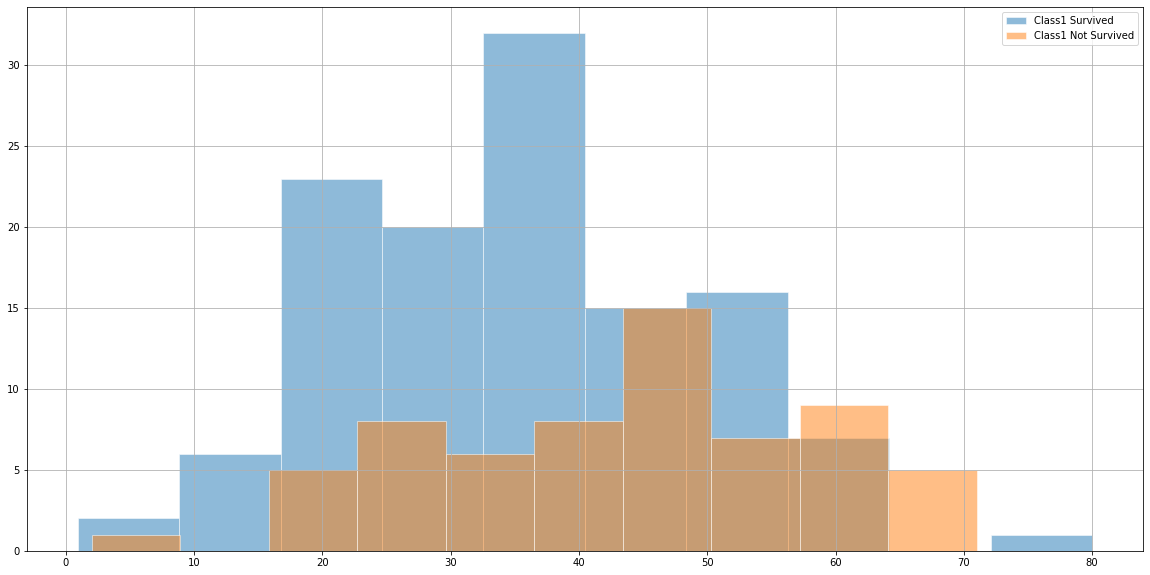

In [57]:
class_n = 1
ax =data[(data.Pclass == class_n) & (data.Survived == 1)]['Age'].hist(figsize=(20, 10), bins=10, edgecolor='white', alpha=0.5)
data[(data.Pclass == class_n) & (data.Survived == 0)]['Age'].hist(figsize=(20, 10), bins=10, edgecolor='white', alpha=0.5)
#data[data.Pclass == 3]['Age'].hist(figsize=(20, 10), bins=80, edgecolor='white', alpha=0.5)

ax.legend(['Class'+str(class_n)+' Survived', 'Class'+str(class_n)+' Not Survived'])



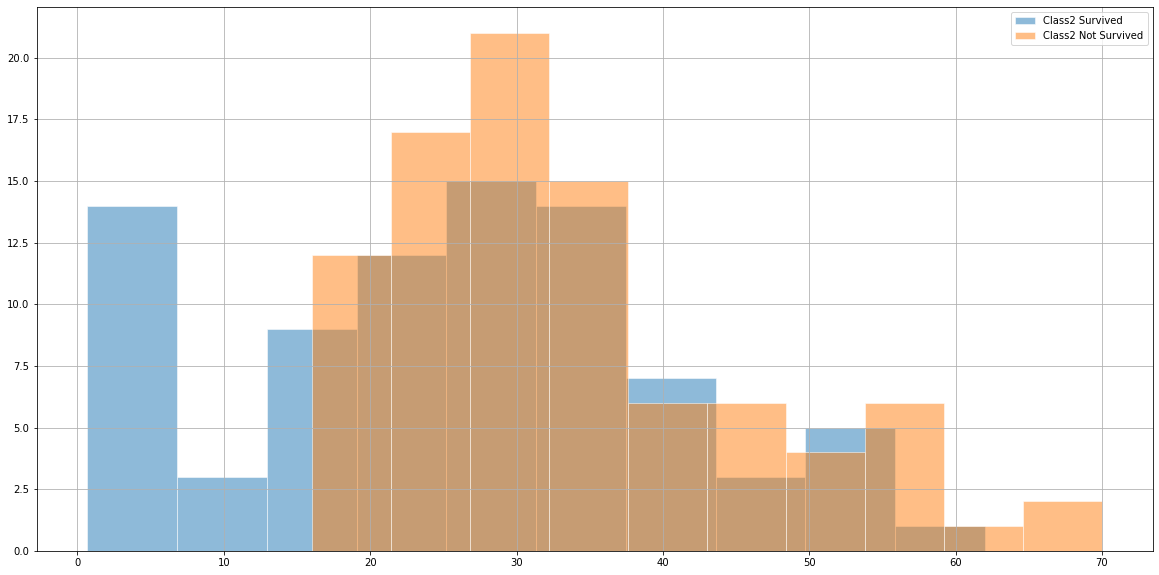

In [58]:
class_n = 2
ax =data[(data.Pclass == class_n) & (data.Survived == 1)]['Age'].hist(figsize=(20, 10), bins=10, edgecolor='white', alpha=0.5)
data[(data.Pclass == class_n) & (data.Survived == 0)]['Age'].hist(figsize=(20, 10), bins=10, edgecolor='white', alpha=0.5)
#data[data.Pclass == 3]['Age'].hist(figsize=(20, 10), bins=80, edgecolor='white', alpha=0.5)

ax.legend(['Class'+str(class_n)+' Survived', 'Class'+str(class_n)+' Not Survived'])

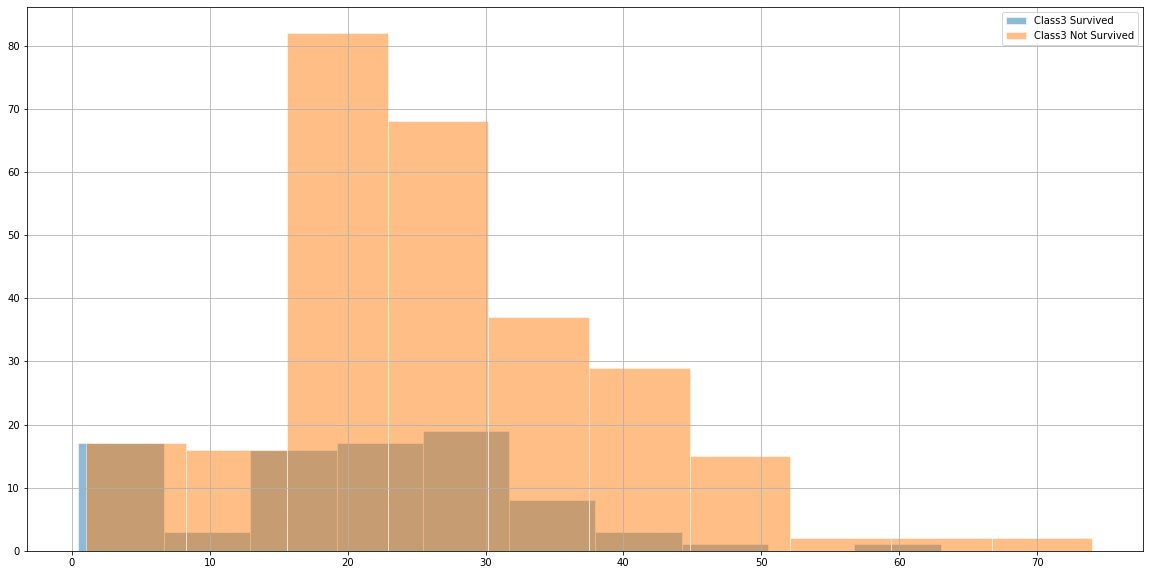

In [59]:
class_n = 3
ax =data[(data.Pclass == class_n) & (data.Survived == 1)]['Age'].hist(figsize=(20, 10), bins=10, edgecolor='white', alpha=0.5)
data[(data.Pclass == class_n) & (data.Survived == 0)]['Age'].hist(figsize=(20, 10), bins=10, edgecolor='white', alpha=0.5)
#data[data.Pclass == 3]['Age'].hist(figsize=(20, 10), bins=80, edgecolor='white', alpha=0.5)

ax.legend(['Class'+str(class_n)+' Survived', 'Class'+str(class_n)+' Not Survived'])

## Гипотезa 3. Выжимаемость зависела от цены билета

Средняя цена билета по классам

In [62]:
data.groupby(['Pclass','Survived'])['Fare'].mean().unstack().round()

Survived,0,1
Pclass,,
1,65.0,96.0
2,19.0,22.0
3,14.0,14.0


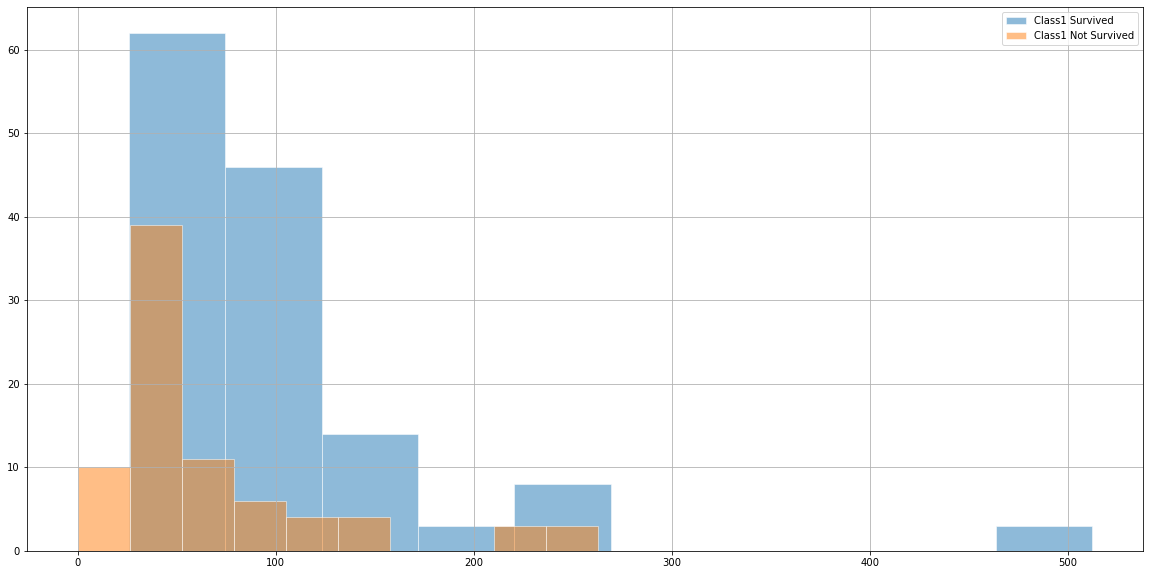

In [63]:
class_n = 1
ax =data[(data.Pclass == class_n) & (data.Survived == 1)]['Fare'].hist(figsize=(20, 10), bins=10, edgecolor='white', alpha=0.5)
data[(data.Pclass == class_n) & (data.Survived == 0)]['Fare'].hist(figsize=(20, 10), bins=10, edgecolor='white', alpha=0.5)
#data[data.Pclass == 3]['Age'].hist(figsize=(20, 10), bins=80, edgecolor='white', alpha=0.5)

ax.legend(['Class'+str(class_n)+' Survived', 'Class'+str(class_n)+' Not Survived'])

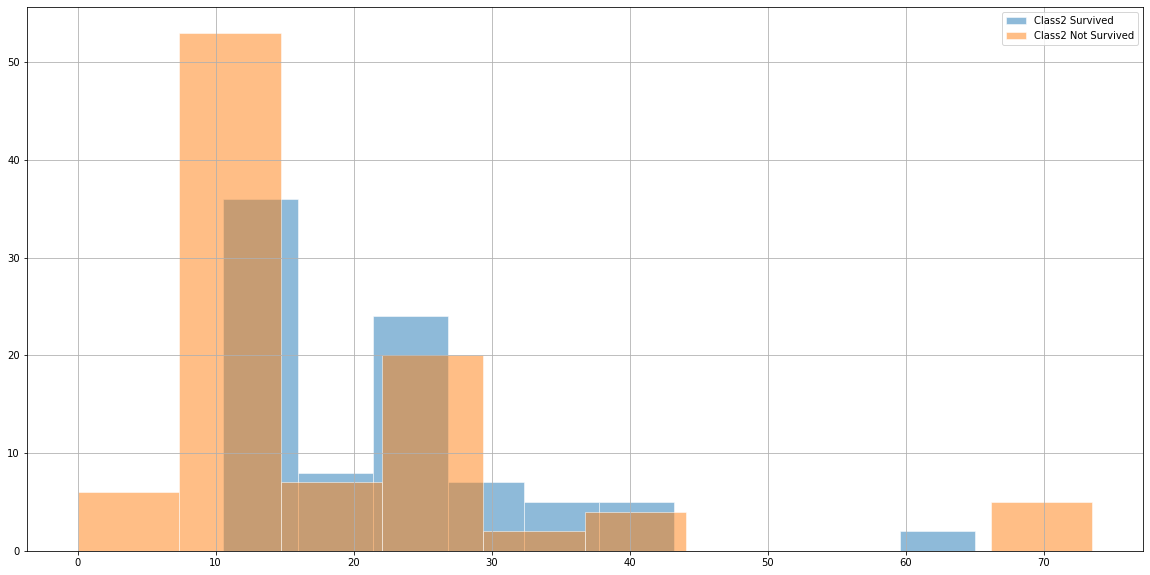

In [64]:
class_n = 2
ax =data[(data.Pclass == class_n) & (data.Survived == 1)]['Fare'].hist(figsize=(20, 10), bins=10, edgecolor='white', alpha=0.5)
data[(data.Pclass == class_n) & (data.Survived == 0)]['Fare'].hist(figsize=(20, 10), bins=10, edgecolor='white', alpha=0.5)
#data[data.Pclass == 3]['Age'].hist(figsize=(20, 10), bins=80, edgecolor='white', alpha=0.5)

ax.legend(['Class'+str(class_n)+' Survived', 'Class'+str(class_n)+' Not Survived'])

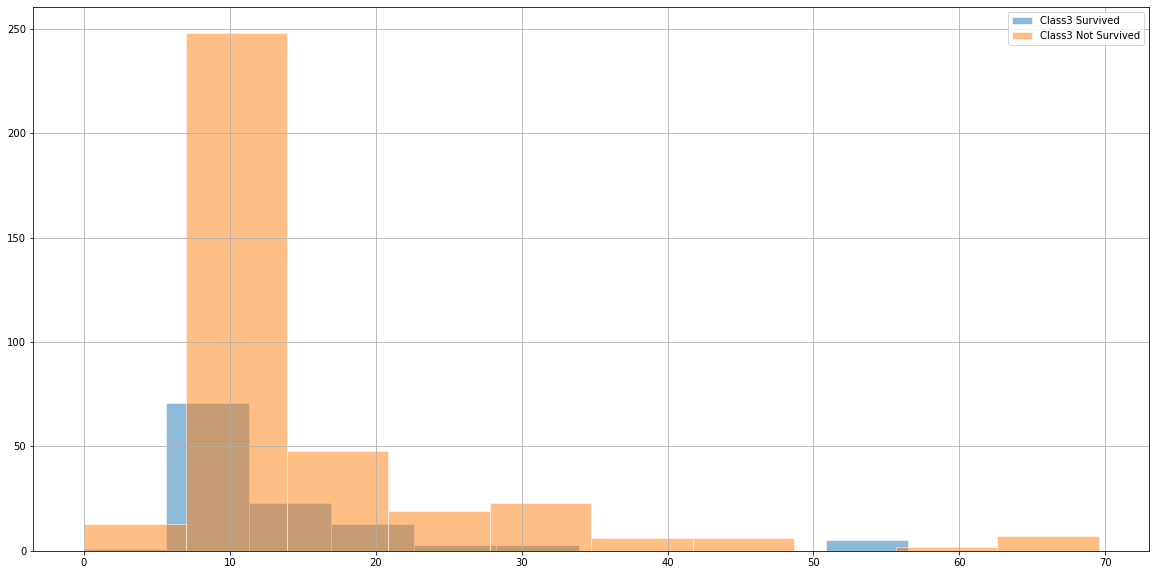

In [65]:
class_n = 3
ax =data[(data.Pclass == class_n) & (data.Survived == 1)]['Fare'].hist(figsize=(20, 10), bins=10, edgecolor='white', alpha=0.5)
data[(data.Pclass == class_n) & (data.Survived == 0)]['Fare'].hist(figsize=(20, 10), bins=10, edgecolor='white', alpha=0.5)
#data[data.Pclass == 3]['Age'].hist(figsize=(20, 10), bins=80, edgecolor='white', alpha=0.5)

ax.legend(['Class'+str(class_n)+' Survived', 'Class'+str(class_n)+' Not Survived'])